<a href="https://colab.research.google.com/github/RysanDeluna/Quantum/blob/main/Grad_Research/GeneralCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
# Instances the random generator
rng = np.random.default_rng()

# Generates data
data = rng.integers(0,2,50)
data

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0])

A função abaixo converte um número inteiro que representa a regra pelo Código de Wolfram em um `array` de números binários.

In [ ]:
binary_rule = lambda rule : np.array([int(bit) for bit in np.binary_repr(rule, 8)])
binary_rule(90)

array([0, 1, 0, 1, 1, 0, 1, 0])

Usando esta função, então, é possível saber se uma célula está viva ou morta de acordo com um mapeamento para o índice que representa a relação dela com seus vizinhos. Assim, a função que realiza o mapeamento deve receber o estado de uma célula e seus vizinhos, transformar essa informação em uma representação decimal e identificar o índice determinado pela regra de transição.

In [ ]:
rule_index = lambda l,m,r : 7 - (l*4 + m*2 + r*1)
rule_index(1,1,1)

0

O mapeamento pode ser realizado da seguinte forma para qualquer configuração de vizinhança e qualquer regra para uma única célula.

In [ ]:
rule = binary_rule(90)
rule[rule_index(1,0,1)]

0

In [ ]:
def CA_step(config, rule):
  new_config = [0]*len(config)
  for i in range(0, len(config)):
    m = config[i]
    l = config[i-1] if i != 0 else config[-1]
    r = config[i+1] if i != len(config) - 1 else config[0]

    new_config[i] = rule[rule_index(l,m,r)]
  return new_config

def CA_run(initial_config, n_steps, rule_number):
  current_config = initial_config
  history = [current_config]

  # Create rule
  rule = binary_rule(rule_number)

  # Run the CA
  for n in range(n_steps):
    current_config = CA_step(current_config, rule)
    history.append(current_config)

  return history

In [ ]:
n_cells = 7
n_it = 3
data = np.zeros(n_cells, dtype=int)
data[int(n_cells/2)] = 1

In [ ]:
import matplotlib.pyplot as plt

def print_automata_px(n_cells, n_it, data):
  px = 1/plt.rcParams['figure.dpi']

  fig, ax = plt.subplots(figsize=(n_it*px,n_cells*px))
  ax.matshow(data, cmap='gist_yarg')
  ax.axis(False)
  return fig, ax

def print_automata_std(data, x=10, y=5):
  fig, ax = plt.subplots(figsize=(x,y))
  ax.matshow(np.rot90(data), cmap='gist_yarg')
  return fig, ax


def print_automata_std2(data, x=10, y=5):
  fig, ax = plt.subplots(figsize=(x,y))
  ax.matshow(data, cmap='gist_yarg')
  return fig, ax



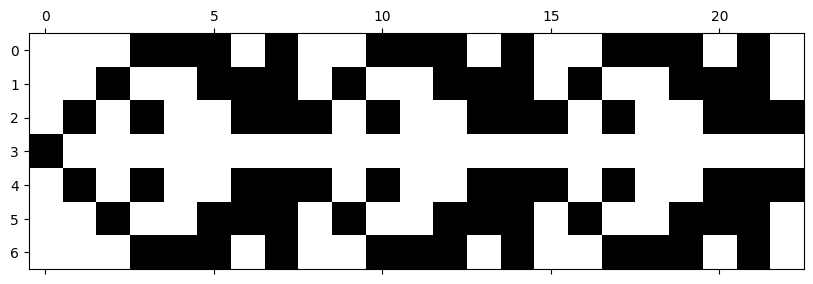

In [ ]:
history = CA_run(data, n_steps=22, rule_number=90)
print_automata_std(history)

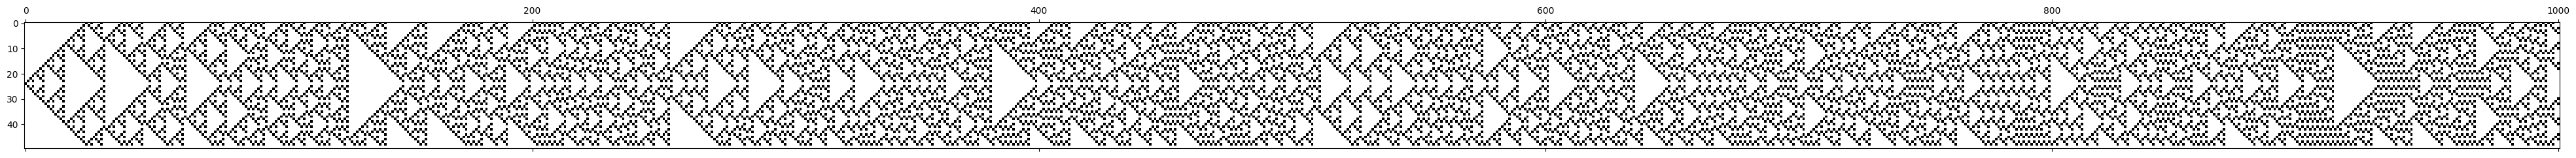

In [ ]:
n_cells = 50
n_it = 1000
data = np.zeros(n_cells, dtype=int)
data[int(n_cells/2)] = 1

data = CA_run(data, n_steps=n_it, rule_number=90)
fig, ax = print_automata_std(data, 50, 40)

In [ ]:
fig.savefig('automata.pdf')

In [ ]:
history[-1]

[0, 0, 1, 0, 1, 0, 0]